In [149]:
import pandas as pd
import os
import io

In [150]:
data_path = "/Users/anasouza/ppgeb_masters/data/teste_ana_13_08.txt"

In [151]:
data_list = []
with io.open(data_path, mode="r", encoding="utf-8") as f:
    for line in f:
        data_list.append(line.rstrip().split())

In [152]:
df_2 = pd.DataFrame(data_list)

df_2.dtypes

0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
17    object
18    object
19    object
20    object
21    object
22    object
23    object
24    object
25    object
26    object
dtype: object

In [153]:

def replace_blink_values(val):
    if val != "0":
        x = "200"
    else:
        x = "0"
    return str(x)

def blink_et(val):
    if val != 0:
        return "BLINK 500"
    if val == 0:
        return str(val)

def identificar_blink_eeg(val):
    try: 
        x = int(val)
        if x > 150:
            return str(500)
        else:
            return str(val)
    except:
        return str(val)


def clean_dataset(data_list):
    df = pd.DataFrame(data_list)
    df.columns=df.iloc[0] 
    df = df.iloc[1:]
    df.iloc[-1,-1] = df.iloc[-1,3]
    df.USER = df.USER.replace("START_RECORDING", "START_RECORDING 100").replace("STOP_EYETRACKER", "STOP_EYETRACKER 200")
    df = df.loc[df["USER"] != "CLIENT2_READY"]

    eeg = df.iloc[:,[2,-1]]
    et = df.iloc[:,:-1]

    et["BKID"] = et.BKID.apply(replace_blink_values)
    eeg['USER'] = eeg.USER.apply(identificar_blink_eeg)
    et["USER"] = et.BKID.apply(blink_et)

    et["BKID"] = et["BKID"].astype("object")
    et["USER"] = et["USER"].astype("object")
    eeg["USER"] = eeg["USER"].astype("object")

    return df, eeg, et

In [154]:
df, eeg, et = clean_dataset(data_list)

/var/folders/c7/n7fskkg1029g6xhbfw1vpc8c0000gn/T/ipykernel_52021/4110602697.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/c7/n7fskkg1029g6xhbfw1vpc8c0000gn/T/ipykernel_52021/4110602697.py:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/c7/n7fskkg1029g6xhbfw1vpc8c0000gn/T/ipykernel_52021/4110602697.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [120]:
eeg.to_csv("/Users/anasouza/ppgeb_masters/data/annotated/eeg_13_08.txt",sep=' ', index=False, header=False)
et.to_csv("/Users/anasouza/ppgeb_masters/data/annotated/et_13_08.txt",sep=' ', index=False, header=False)
df.to_csv("/Users/anasouza/ppgeb_masters/data/annotated/df_13_08.txt",sep=' ', index=False, header=False)

In [121]:
import plotly.express as px
import numpy as np

def plot_time_series_eeg(df):
    df_plot = df.loc[df["USER"] != "START_RECORDING 100"]
    df_plot = df_plot.loc[df["USER"] != "STOP_EYETRACKER 200"]
    df_plot = df_plot.loc[df["USER"].notnull()]
    df_plot.USER = df_plot.USER.astype(int)
    df_plot.TIME = df_plot.TIME.astype(float)
    fig = px.line(df_plot, x='TIME', y="USER")
    fig.show()

In [122]:
plot_time_series_eeg(df)

# Identificar Piscadas em Single Electrode RAW EEG time series

The EEG signature of eye blinks is typically visible for about 200ms of data. When you want to move a window of 50 to 200 samples, I assume that your sampling frequency is 1000Hz (you should specify this in your next question).

A classical feature for eye blink detection is the peak-to-peak amplitude, which is the absolute difference of the maximum amplitude and the minimum amplitude of the EEG within your window. Another feature could be the variance within your EEG window.

Pseudocode:

peak_to_peak_amp = abs(window.max() - window.min())
variance = var(window)
Note that both of these features are rather unspecific to eye blinks and will have a hard time to distinguish blinks from other peaks in the data. For this reason, the methods are often combined with filtering of the data and converting the amplitudes in microvolts to z-scores.

For reading I suggest chapter 6 in the canonical book by Steven Luck: An Introduction to the Event-Related Potential Technique

In [123]:
# identificar piscadas no EEG

def replace_blink_values(val):
    if val != 0:
        x = 200
    else:
        x = 0
    return x


def plot_time_series_ET(df):
    df_plot = df.loc[df["USER"] != "START_RECORDING 100"]
    df_plot = df_plot.loc[df["USER"] != "STOP_EYETRACKER 200"]
    df_plot = df_plot.loc[df["USER"].notnull()]
    df_plot.BKID = df_plot.BKID.astype(int)
    df_plot.TIME = df_plot.TIME.astype(float)
    df_plot["BKID_t"] = df_plot.BKID.apply(replace_blink_values)
    fig = px.line(df_plot, x='TIME', y="BKID_t")
    fig.show()

In [124]:
plot_time_series_ET(df)

In [125]:
import matplotlib.pyplot as plt 

def replace_blink_values(val):
    if val != 0:
        x = 500
    else:
        x = 0
    return x

def blink_et(val):
    if val != 0:
        return 500
    if val == 0:
        return val

def identificar_blink_eeg(val):
    if x > 150:
        return 500
    else:
        return val

def plot_both(df):

    df_plot = df.loc[df["USER"] != "START_RECORDING 100"]
    df_plot = df_plot.loc[df["USER"] != "STOP_EYETRACKER 200"]
    df_plot = df_plot.loc[df["USER"].notnull()]

    df_plot.USER = df_plot.USER.astype(int)
    df_plot.TIME = df_plot.TIME.astype(float) 
    df_plot.BKID = df_plot.BKID.astype(int)

    df_plot["BKID"] = df_plot.BKID.apply(replace_blink_values)

    ax1 = df_plot.USER.plot(color='blue', grid=True, label='Count')
    ax2 = df_plot.BKID.plot(color='orange', grid=True, secondary_y=True)

    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()

    plt.show()

    eeg = df_plot.iloc[:,[2,-1]]
    et = df_plot.iloc[:,:-1]


    return df_plot, eeg, et

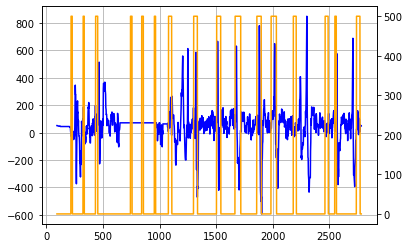

In [126]:
df, eeg, et = plot_both(df) #ja não estão tão distantes

In [127]:
import statsmodels.api as sm

sm.tsa.stattools.ccf(eeg['USER'], et['BKID'], adjusted=False)


array([-1.49718260e-02, -2.89491173e-02, -3.84095087e-02, ...,
        9.81235630e-07,  6.54157087e-07,  3.27078543e-07])

In [128]:
#pip install -U scikit-learn

In [129]:
#pip install streamlit

In [130]:
import numpy as np
import pandas as pd
import streamlit as st
import plotly.express as px
from sklearn.metrics import r2_score

In [131]:
df

,DATATYPE,CNT,TIME,LPCX,LPCY,LPD,LPS,LPV,RPCX,RPCY,...,LPUPILV,REYEX,REYEY,REYEZ,RPUPILD,RPUPILV,BKID,BKDUR,BKPMIN,USER
94,SMP,32953,573.80377,0.30764,0.67217,9.66063,1.28527,1,0.63237,0.66740,...,1,0.02542,-0.02157,0.67286,0.00348,1,0,0.00000,31,52
95,SMP,32954,573.80908,0.30749,0.67183,9.54421,1.27272,1,0.63275,0.66779,...,1,0.02542,-0.02157,0.67286,0.00365,1,0,0.00000,31,52
96,SMP,32955,573.81769,0.30745,0.67189,9.72073,1.26016,1,0.63283,0.66791,...,1,0.02542,-0.02157,0.67286,0.00367,1,0,0.00000,31,52
97,SMP,32956,573.83417,0.30720,0.67162,10.06603,1.24761,1,0.63268,0.66822,...,1,0.02542,-0.02157,0.67286,0.00353,1,0,0.00000,31,52
99,SMP,32957,573.85059,0.30753,0.67170,9.78411,1.23506,1,0.63257,0.66858,...,1,0.02542,-0.02157,0.67286,0.00353,1,0,0.00000,31,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2778,SMP,34611,601.62860,0.35828,0.64327,10.48061,1.33797,1,0.67563,0.65125,...,1,0.03366,-0.02008,0.69332,0.00374,1,0,0.00000,32,49
2779,SMP,34612,601.64069,0.35819,0.64350,10.28098,1.33797,1,0.67533,0.65114,...,1,0.03366,-0.02008,0.69332,0.00385,1,0,0.00000,32,49
2780,SMP,34613,601.64795,0.35810,0.64344,10.50952,1.33797,1,0.67544,0.65110,...,1,0.03366,-0.02008,0.69332,0.00381,1,0,0.00000,32,49
2781,SMP,34614,601.66425,0.35800,0.64329,10.51575,1.33797,1,0.67519,0.65128,...,1,0.03366,-0.02008,0.69332,0.00383,1,0,0.00000,32,49


In [132]:
x = np.array(df['USER'].fillna(0))
y = np.array(df['BKID'].fillna(0))

In [133]:
import numpy as np
from scipy.spatial.distance import euclidean

from fastdtw import fastdtw

distance, path = fastdtw(x, y, dist=euclidean)

In [134]:
path[-1]

(1662, 1662)

In [135]:
result = []
for i in range(0,len(path)):
    result.append([df['TIME'].iloc[path[i][0]],
    df['USER'].iloc[path[i][0]],
    df['BKID'].iloc[path[i][1]]])
df_sync = pd.DataFrame(data=result,columns=['TIME','USER','BKID']).dropna()
df_sync = df_sync.drop_duplicates(subset=['TIME'])
df_sync = df_sync.sort_values(by='TIME')
df_sync = df_sync.reset_index(drop=True)

In [136]:
def chart(df):
    df_columns = list(df)
    df = df.sort_values(by='TIME')

    fig = px.line(df, x="TIME", y=[ "USER", "BKID"])
    fig.update_layout(
        font_family="IBM Plex Sans",
        font_color="black"
        )
    fig.update_xaxes(
        rangeselector=dict(
            buttons=list([
                dict(count=12, label="12h", step="hour", stepmode="backward"),
                dict(count=1, label="1d", step="day", stepmode="backward"),
                dict(count=7, label="7d", step="day", stepmode="backward"),
                dict(step="all")
            ])
            )
        )

    fig.show()

    st.write(fig)

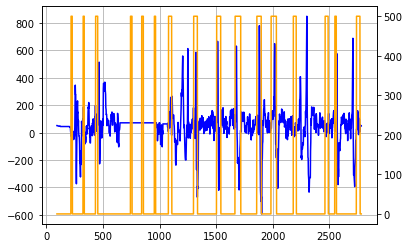

In [137]:
df, eeg, et = plot_both(df)

In [139]:
chart(df)

In [138]:
chart(df_sync)

# Syncronize Different Types of Waves

### Correlation Coefficients using Sklearn Canonical Correlation Analysis

In [155]:
x = np.array(df['USER'].fillna(0))
y = np.array(df['BKID'].fillna(0))

In [156]:
from sklearn.cross_decomposition import CCA

cca = CCA(n_components=1)
cca.fit(x,y)

ValueError: could not convert string to float: 'START_RECORDING 100'